In [87]:
# Importing the other libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [88]:
# Importing the dataset
data = pd.read_excel('Combined New_V1.xlsx',sheet_name = "data with 1140 SBET" )


In [89]:
data.head()
#data.shape
#type(data)

,Yield,Main Metal,MW Metal,CR Metal,Electronegativity of Metal,Support 1,Name S1,MW Support 1,Support 2,Name of S2,...,Mol wt of P2,BET,Pore volume,H2/CO2,WHSV,Catalyst amount,Pressure,Temperature,Calc T,Calc T.
0,2620.0,4.4,In,1.44,1.7,88.6,Fe3O4,159.69,0.0,0,...,0,9.0,0.049,10.0,115500.0,0.50,6.0,598.0,623,2.0
1,2400.0,4.4,In,1.44,1.7,88.6,Fe3O4,159.69,0.0,0,...,0,9.0,0.049,8.0,94500.0,0.50,6.0,598.0,623,2.0
2,2233.6,36.5,Cu,1.17,1.9,12.0,ZnO,81.38,0.0,0,...,0,218.0,0.460,3.0,120000.0,0.02,4.0,453.0,573,4.0
3,2230.0,4.4,In,1.44,1.7,88.6,Fe3O4,159.69,0.0,0,...,0,9.0,0.049,10.0,115500.0,0.50,4.0,598.0,623,2.0
4,2224.0,36.5,Cu,1.17,1.9,12.0,ZnO,81.38,48.6,SBA-15,...,0,218.0,0.470,3.0,60000.0,0.04,4.0,453.0,773,5.0


In [90]:
data['Yield ']

0       2620.000000
1       2400.000000
2       2233.600000
3       2230.000000
4       2224.000000
           ...     
1136       0.861556
1137       0.767644
1138       0.761896
1139       0.747433
1140       0.737274
Name: Yield , Length: 1141, dtype: float64

In [91]:
len(data)

1141

In [92]:
X = data[['Main Metal ','CR Metal','Electronegativity of Metal', 'Total MW_S', 'Promoter 1','Promoter 2','BET ','H2/CO2','WHSV','Pressure','Temperature','Calc T.','Calc T']]
y = data['Yield ']


In [93]:
type(y)

pandas.core.series.Series

In [94]:
# Descriptive statistics for each column
y.describe()

count    1141.000000
mean      172.651246
std       271.470482
min         0.737274
25%        34.900000
50%        86.400000
75%       207.000000
max      2620.000000
Name: Yield , dtype: float64

In [95]:
import matplotlib.pyplot

(array([924., 150.,  36.,  10.,   5.,   5.,   3.,   3.,   3.,   2.]),
 array([7.37273867e-01, 2.62663546e+02, 5.24589819e+02, 7.86516092e+02,
        1.04844236e+03, 1.31036864e+03, 1.57229491e+03, 1.83422118e+03,
        2.09614745e+03, 2.35807373e+03, 2.62000000e+03]),
 <BarContainer object of 10 artists>)

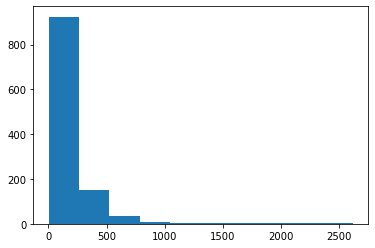

In [96]:
matplotlib.pyplot.hist(y)

In [97]:
X.describe()

,Main Metal,CR Metal,Electronegativity of Metal,Total MW_S,Promoter 1,Promoter 2,BET,H2/CO2,WHSV,Pressure,Temperature,Calc T.,Calc T
count,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000
mean,33.643958,1.255863,1.883874,123.312901,2.548624,0.138247,106.431674,3.720771,12359.068388,3.883786,525.839389,3.606924,687.615250
std,32.062594,0.116757,0.147146,84.982739,5.031515,0.776670,109.193144,1.977340,13217.603531,4.435005,42.321955,1.059607,84.331729
min,0.000000,1.170000,1.700000,0.000000,0.000000,0.000000,2.000000,1.000000,900.000000,0.100000,433.000000,2.000000,573.000000
25%,8.500000,1.170000,1.700000,60.080000,0.000000,0.000000,37.000000,3.000000,4482.800000,3.000000,503.000000,3.000000,623.000000
50%,19.400000,1.170000,1.900000,123.220000,0.000000,0.000000,82.810000,3.000000,9000.000000,3.000000,523.000000,4.000000,673.000000
75%,45.550700,1.440000,1.900000,183.340000,4.870000,0.000000,139.000000,3.800000,15000.000000,4.100000,553.000000,4.000000,723.000000
max,100.000000,1.440000,2.200000,501.500000,57.000000,7.140000,1102.000000,20.000000,120000.000000,36.000000,673.000000,7.000000,973.000000


In [98]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)


<AxesSubplot:>

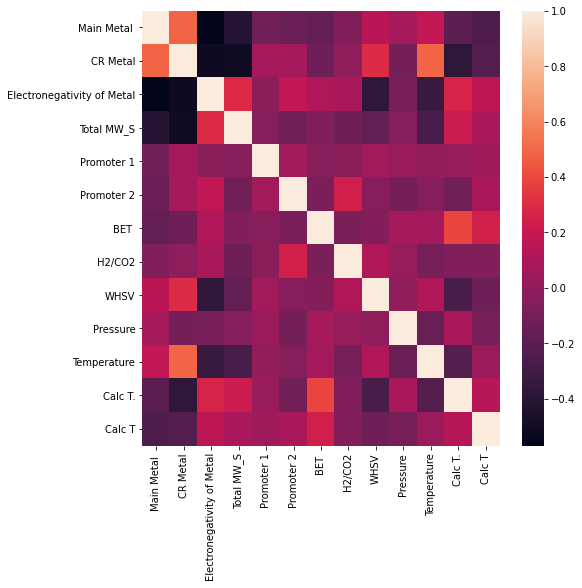

In [99]:
#Idenitfy corelated independent variables through heatmap
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(corrmat)

#plt.savefig("Heatmap.png",dpi=300)

In [100]:
X_train.count()
#X_train.shape

Main Metal                    969
CR Metal                      969
Electronegativity of Metal    969
Total MW_S                    969
Promoter 1                    969
Promoter 2                    969
BET                           969
H2/CO2                        969
WHSV                          969
Pressure                      969
Temperature                   969
Calc T.                       969
Calc T                        969
dtype: int64

The training R2 is:  0.9723220648376949
The test R2 is:  0.9235706297088333
MSE: 5255.15
RMSE of test set: 72.49
RMSE of train set: 45.38
The mean accuracy is:  0.7417520651204874


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


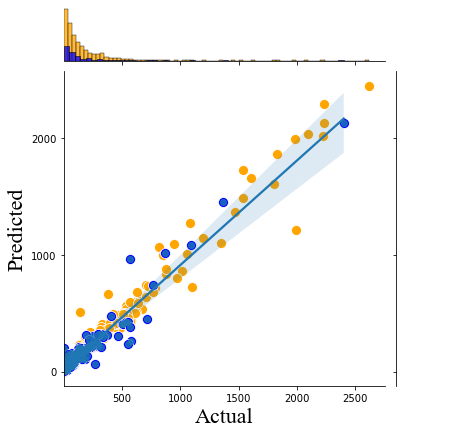

In [101]:
# Fitting RandomForest Regression to the Training set


from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor()
model.fit(X_train, y_train)


#Measure the R2 for training and test set
model_score = model.score(X_train,y_train)
print("The training R2 is: ", model.score(X_train, y_train))
print("The test R2 is: ", model.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = model.predict(X_test)
y_predicted_train = model.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())

#Plotting the joint plot of  actual v/s predicted
pp_tr = model.predict(X_train)

from sklearn.metrics import mean_squared_error, r2_score
g = sns.JointGrid(y_test, y_predicted)
sns.scatterplot(x=y_train, y=pp_tr, s=100, color='orange', ax=g.ax_joint)
sns.scatterplot(x=y_test, y=y_predicted, s=100, color='blue', ax=g.ax_joint)
sns.regplot(x=y_test, y=y_predicted, ax=g.ax_joint)
#sns.lineplot(x=y_test, y=y_predicted, ax=g.ax_joint)


#g.ax_joint.legend(["Test", "Train"])
g.set_axis_labels("Actual", "Predicted", fontsize =22, fontname = 'Times New Roman')
sns.histplot(x=y_train,ax=g.ax_marg_x, color ='orange')
sns.histplot(x=y_test, ax=g.ax_marg_x, color ='blue')

#g.ax_marg_x.legend(["Train", "Test"])
#g.ax_marg_x.set_title("KDE plots of Train & Test data")

plt.locator_params(tight=None, nbins=5)
plt.show()

In [102]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

The training R2 is:  0.9978332326791688
The test R2 is:  0.9309662845348106
MSE: 4746.64
RMSE of test set: 68.90
RMSE of train set: 12.70
The mean accuracy is:  0.7632479563335591


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


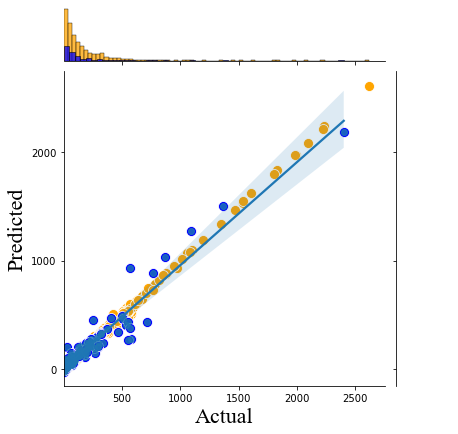

In [103]:
# Fitting XGB and LGB Regression to the Training set

modelXGB = XGBRegressor()

modelXGB.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = modelXGB.score(X_train,y_train)
print("The training R2 is: ", modelXGB.score(X_train, y_train))
print("The test R2 is: ", modelXGB.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = modelXGB.predict(X_test)
y_predicted_train = modelXGB.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelXGB, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plotting the joint plot of  actual v/s predicted
pp_tr = modelXGB.predict(X_train)

from sklearn.metrics import mean_squared_error, r2_score
g = sns.JointGrid(y_test, y_predicted)
sns.scatterplot(x=y_train, y=pp_tr, s=100, color='orange', ax=g.ax_joint)
sns.scatterplot(x=y_test, y=y_predicted, s=100, color='blue', ax=g.ax_joint)
sns.regplot(x=y_test, y=y_predicted, ax=g.ax_joint)
#sns.lineplot(x=y_test, y=y_predicted, ax=g.ax_joint)


#g.ax_joint.legend(["Test", "Train"])
g.set_axis_labels("Actual", "Predicted", fontsize =22, fontname = 'Times New Roman')
sns.histplot(x=y_train,ax=g.ax_marg_x, color ='orange')
sns.histplot(x=y_test, ax=g.ax_marg_x, color ='blue')

#g.ax_marg_x.legend(["Train", "Test"])
#g.ax_marg_x.set_title("KDE plots of Train & Test data")

plt.locator_params(tight=None, nbins=5)
plt.show()

The training R2 is:  0.91195539610613
The test R2 is:  0.8571509474433495
MSE: 9822.06
RMSE of test set: 99.11
RMSE of train set: 80.93
The mean accuracy is:  0.7957727196604111


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


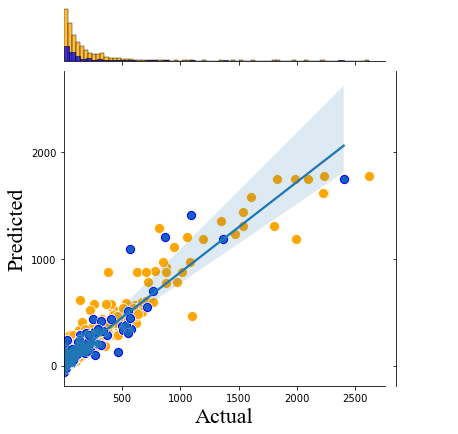

In [104]:
model = LGBMRegressor()
    
model.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = model.score(X_train,y_train)
print("The training R2 is: ", model.score(X_train, y_train))
print("The test R2 is: ", model.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = model.predict(X_test)
y_predicted_train = model.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())



#Plotting the joint plot of  actual v/s predicted
pp_tr = model.predict(X_train)

from sklearn.metrics import mean_squared_error, r2_score
g = sns.JointGrid(y_test, y_predicted)
sns.scatterplot(x=y_train, y=pp_tr, s=100, color='orange', ax=g.ax_joint)
sns.scatterplot(x=y_test, y=y_predicted, s=100, color='blue', ax=g.ax_joint)
sns.regplot(x=y_test, y=y_predicted, ax=g.ax_joint)
#sns.lineplot(x=y_test, y=y_predicted, ax=g.ax_joint)


#g.ax_joint.legend(["Test", "Train"])
g.set_axis_labels("Actual", "Predicted", fontsize =22, fontname = 'Times New Roman')
sns.histplot(x=y_train,ax=g.ax_marg_x, color ='orange')
sns.histplot(x=y_test, ax=g.ax_marg_x, color ='blue')

#g.ax_marg_x.legend(["Train", "Test"])
#g.ax_marg_x.set_title("KDE plots of Train & Test data")

plt.locator_params(tight=None, nbins=5)
plt.show()


The training R2 is: 0.919
The test R2 is: 0.869 
MSE: 9038.21
RMSE of test set: 95.07
RMSE of train set: 77.86
The mean accuracy is:  0.7547386977028114


C:\Users\msuvarna\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yield ', ylabel='Count'>

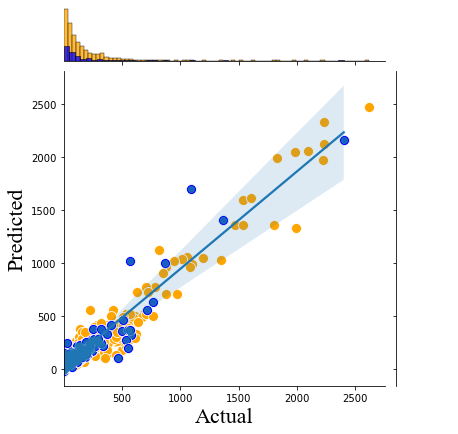

In [19]:
# Fitting GBDT Regression to the entire data

from sklearn.ensemble import GradientBoostingRegressor
modelGBT =  GradientBoostingRegressor()

modelGBT.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = modelGBT.score(X_train,y_train)
print("The training R2 is: %.3f" % modelGBT.score(X_train, y_train))
print("The test R2 is: %.3f "% modelGBT.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = modelGBT.predict(X_test)
y_predicted_train = modelGBT.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelGBT, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plotting the joint plot of  actual v/s predicted
pp_tr = modelGBT.predict(X_train)

from sklearn.metrics import mean_squared_error, r2_score
g = sns.JointGrid(y_test, y_predicted)
sns.scatterplot(x=y_train, y=pp_tr, s=100, color='orange', ax=g.ax_joint)
sns.scatterplot(x=y_test, y=y_predicted, s=100, color='blue', ax=g.ax_joint)
sns.regplot(x=y_test, y=y_predicted, ax=g.ax_joint)
#sns.lineplot(x=y_test, y=y_predicted, ax=g.ax_joint)


#g.ax_joint.legend(["Test", "Train"])
g.set_axis_labels("Actual", "Predicted", fontsize =22, fontname = 'Times New Roman')
sns.histplot(x=y_train,ax=g.ax_marg_x, color ='orange')
sns.histplot(x=y_test, ax=g.ax_marg_x, color ='blue')



In [18]:
#Grid search for XGB
from sklearn.model_selection import GridSearchCV

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=22)
model = XGBRegressor()
param_grid = {'eta':[0.05,0.1,0.15,0.2],
                 'max_depth':[4,6,8,10],
                 'subsample':[0.5,1],
                 'colsample_bytree':[0.5,1],
                 'eval_metric':['rmse'],
                 'seed':[42],
                 'n_estimators':np.arange(100,1001,100).tolist()}


tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=3,
                          verbose=1,
                          n_jobs=-1)
    
tuning.fit(X_train, y_train)

print("Best parameters:")
print(tuning.best_params_)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  8.5min finished


Best parameters:
{'colsample_bytree': 0.5, 'eta': 0.15, 'eval_metric': 'rmse', 'max_depth': 4, 'n_estimators': 1000, 'seed': 42, 'subsample': 1}


The training R2 is:  0.998317188214062
The test R2 is:  0.9131709433476163
MSE: 5970.22
RMSE of test set: 77.27
RMSE of train set: 11.19
The mean accuracy is:  0.8317389972830052


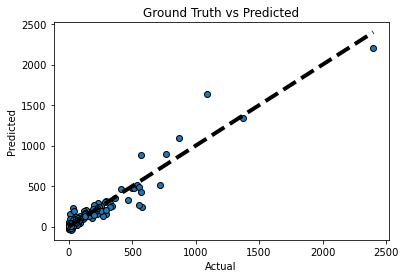

In [105]:
modelXGB = XGBRegressor(colsample_bytree = 0.5, eta = 0.15, eval_metric= 'rmse', max_depth= 4,
                     n_estimators= 1000, seed= 42, subsample= 1)

modelXGB.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = modelXGB.score(X_train,y_train)
print("The training R2 is: ", modelXGB.score(X_train, y_train))
print("The test R2 is: ", modelXGB.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = modelXGB.predict(X_test)
y_predicted_train = modelXGB.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelXGB, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


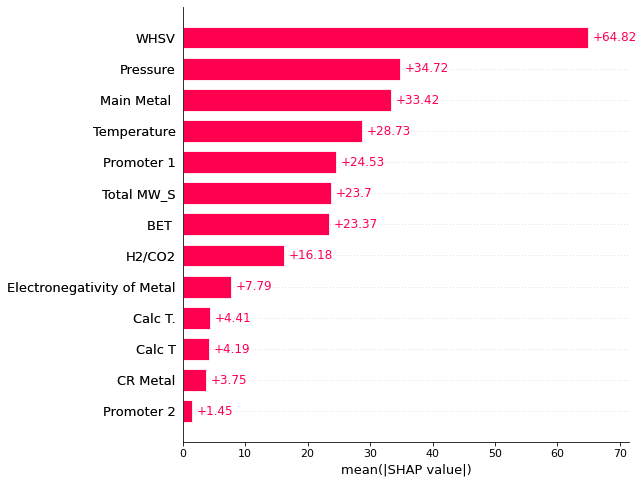

In [106]:
 # default is max_display=12
    # without adding CR METAL AND ELECTRONEGATIVITY OF METAL I GOT THIS PLOT
import shap

explainer = shap.Explainer(modelXGB)
shap_values = explainer(X_train)

shap.plots.bar(shap_values, max_display=15)

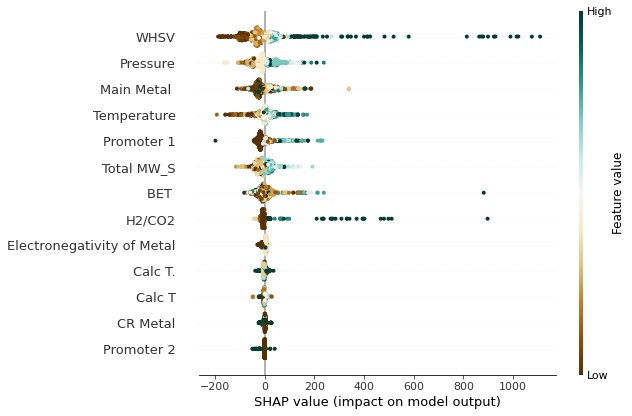

In [108]:
fig=plt.gcf()
shap.summary_plot(shap_values, X_train, show = False,cmap='BrBG')
fig.savefig("shapsummary.svg",dpi=600,bbox_inches='tight')

In [73]:
from sklearn.inspection import PartialDependenceDisplay


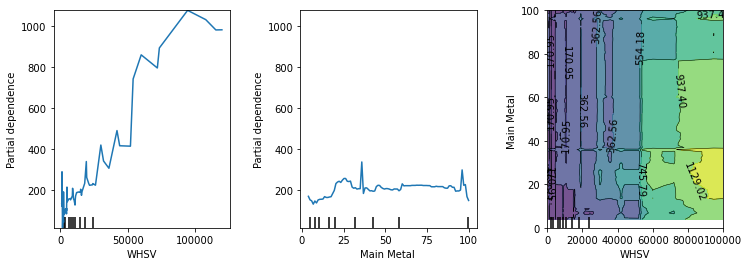

In [82]:
features = ['WHSV', 'Main Metal ', ('WHSV', 'Main Metal ')]
_,ax = plt.subplots(ncols=3,figsize=(12,4))
display=PartialDependenceDisplay.from_estimator(modelXGB, X_train, features,ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

plt.ylim(0, 100,5)
plt.xlim(0,100000)
plt.savefig("PDP11.svg",dpi=600)

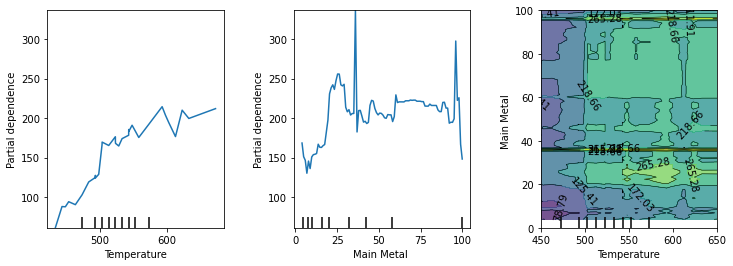

In [75]:
features = ['Temperature', 'Main Metal ', ('Temperature', 'Main Metal ')]
_,ax = plt.subplots(ncols=3,figsize=(12,4))
display=PartialDependenceDisplay.from_estimator(modelXGB, X_train, features,ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

plt.ylim(0, 100,5)
plt.xlim(450,650)
plt.savefig("PDP2.svg",dpi=600)

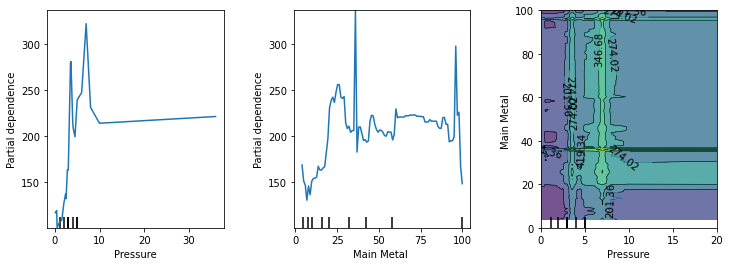

In [76]:
features = ['Pressure', 'Main Metal ', ('Pressure', 'Main Metal ')]
_,ax = plt.subplots(ncols=3,figsize=(12,4))
display=PartialDependenceDisplay.from_estimator(modelXGB, X_train, features,ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

plt.ylim(0, 100,5)
plt.xlim(0,20)
plt.savefig("PDP3.svg",dpi=600)

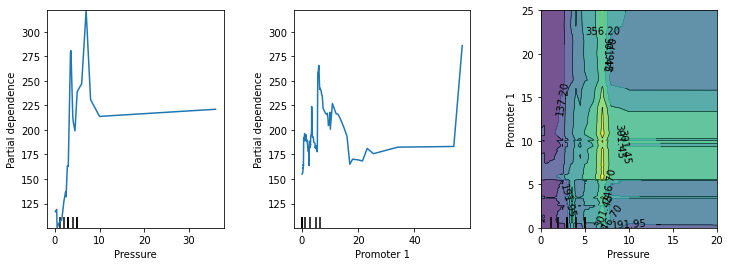

In [77]:
features = ['Pressure', 'Promoter 1', ('Pressure', 'Promoter 1')]
_,ax = plt.subplots(ncols=3,figsize=(12,4))

display=PartialDependenceDisplay.from_estimator(modelXGB, X_train, features,ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

plt.ylim(0, 25,5)
plt.xlim(0, 20,2)
plt.savefig("PDP4.svg",dpi=600)

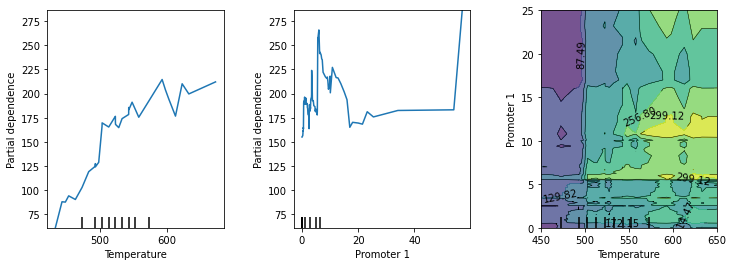

In [78]:
features = ['Temperature', 'Promoter 1', ('Temperature', 'Promoter 1')]
_,ax = plt.subplots(ncols=3,figsize=(12,4))

display=PartialDependenceDisplay.from_estimator(modelXGB, X_train, features,ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)



plt.ylim(0, 25,5)
plt.xlim(450, 650,2)
plt.savefig("PDP5.svg",dpi=600)

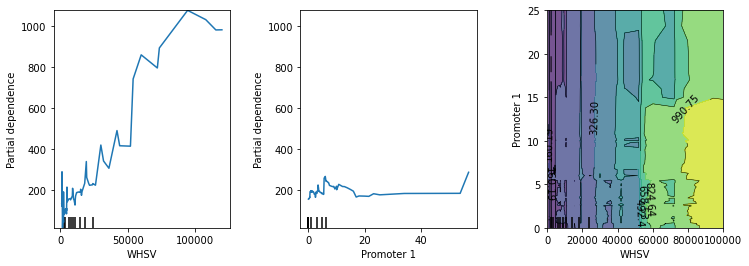

In [83]:
features = ['WHSV', 'Promoter 1', ('WHSV', 'Promoter 1')]
_,ax = plt.subplots(ncols=3,figsize=(12,4))

display=PartialDependenceDisplay.from_estimator(modelXGB, X_train, features,ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

plt.ylim(0, 25,5)
plt.xlim(0,100000)
plt.savefig("PDP16.svg",dpi=600)

In [44]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


In [197]:
#Grid search for RF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=22)
model = RandomForestRegressor()
param_grid = {'eta':[0.05,0.1,0.15,0.2],
                 'max_depth':[4,6,8,10],
                 'subsample':[0.5,1],
                 'colsample_bytree':[0.5,1],
                 'eval_metric':['rmse'],
                 'seed':[42],
                 'n_estimators':np.arange(100,1001,100).tolist()}


param_grid={'n_estimators':np.arange(100,1001,100).tolist(),
                'max_features':['sqrt'],
                'max_depth':[20,40,60,80,None],
                'min_samples_split':[2,6,10]}

tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=3,
                          verbose=1,
                          n_jobs=-1)
    

tuning.fit(X_train, y_train)

print("Best parameters:")
print(tuning.best_params_)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   57.4s finished


Best parameters:
{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}


The training R2 is:  0.9773043397490745
The test R2 is:  0.8874871255993072
MSE: 8440.22
RMSE of test set: 91.87
RMSE of train set: 43.39
The mean accuracy is:  0.8038723420531882


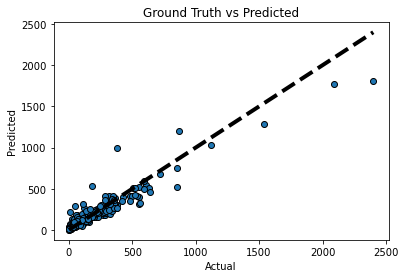

In [198]:
modelRF = RandomForestRegressor(max_depth = 40, max_features = 'sqrt', min_samples_split = 2, n_estimators = 500)

modelRF.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = modelRF.score(X_train,y_train)
print("The training R2 is: ", modelRF.score(X_train, y_train))
print("The test R2 is: ", modelRF.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = modelRF.predict(X_test)
y_predicted_train = modelRF.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelRF, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

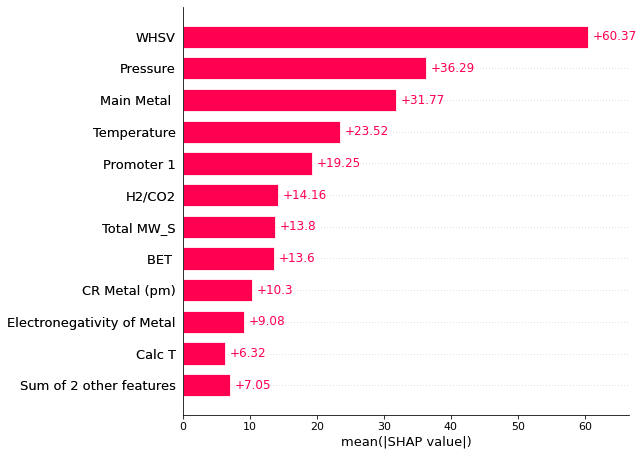

In [199]:
import shap

explainer = shap.Explainer(modelRF)
shap_values = explainer(X_train)

shap.plots.bar(shap_values, max_display=12) # default is max_display=12

The training R2 is: 0.965
The test R2 is: 0.902 
MSE: 7332.26
RMSE of test set: 85.63
RMSE of train set: 53.94
The mean accuracy is:  0.8001810818307454


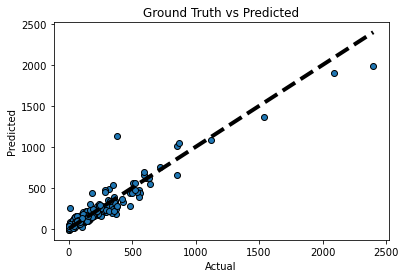

In [201]:
modelGBT =  GradientBoostingRegressor(learning_rate= 0.05, max_depth = 4, min_samples_leaf = 1, min_samples_split = 2, 
                                   n_estimators = 300, subsample = 0.5, random_state=42)


modelGBT.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = modelGBT.score(X_train,y_train)
print("The training R2 is: %.3f" % modelGBT.score(X_train, y_train))
print("The test R2 is: %.3f "% modelGBT.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = modelGBT.predict(X_test)
y_predicted_train = modelGBT.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelGBT, X = X_train, y= y_train, cv=3)
print("The mean accuracy is: ", accuracies.mean())


#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


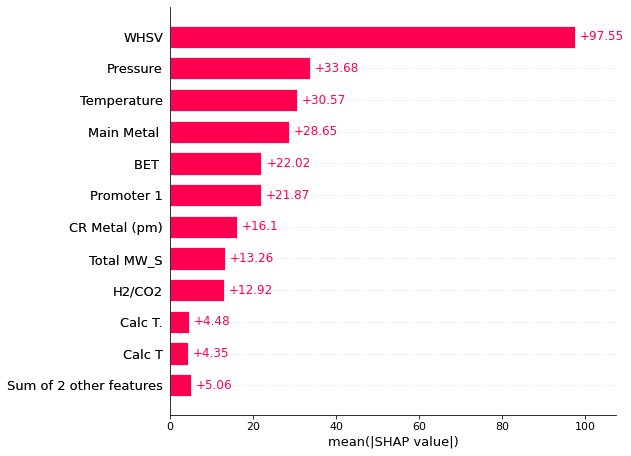

In [202]:
import shap

explainer = shap.Explainer(modelGBT)
shap_values = explainer(X_train)

shap.plots.bar(shap_values, max_display=12) # default is max_display=12

In [203]:
experimentaldata = pd.read_excel('Compiled_data_TPA_20220227.xlsx',sheet_name = "Test 60")

In [204]:
experimentaldata.head()
len(experimentaldata)

60

In [205]:
X_expt = experimentaldata.drop(labels= ['Yield ','MW Metal','Support 1', 'Support 2', 'Support 3','Name S1','MW Support 1','Name of S2','MW S2','Name of S3','MW Support 3','Name of P1','MW P1','Name of P2','Mol wt of P2','Pore volume','Catalyst amount'], axis=1)
y_expt = experimentaldata["Yield "]

#Select subset of data
#X_In = X_expt.iloc[0:36]
#y_In= y_expt.iloc[0:36]
#y_In

In [206]:
y_hat = modelXGB.predict(X_expt)
Pred_exp = pd.DataFrame(y_hat)

In [207]:
from sklearn.metrics import mean_absolute_error
print("The R2 fror experimental validation is: ", modelXGB.score(X_expt,y_expt))

print("MAE: %.2f"% mean_absolute_error(y_expt,y_hat))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_expt,y_hat)))


The R2 fror experimental validation is:  0.8019325506904058
MAE: 99.34
RMSE of test set: 140.97


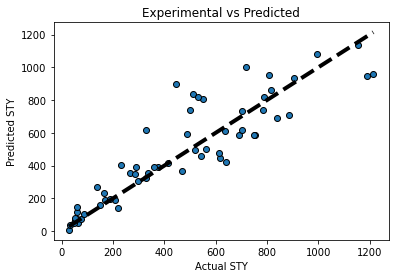

In [208]:
#Plot the actual v/s predicted
fig, ax = plt.subplots()
ax.scatter(y_expt, y_hat, edgecolors=(0, 0, 0))
ax.plot([y_expt.min(), y_expt.max()], [y_expt.min(), y_expt.max()], 'k--', lw=4)
ax.set_xlabel('Actual STY')
ax.set_ylabel('Predicted STY')
ax.set_title("Experimental vs Predicted")
plt.show()


In [210]:
finalconcat= pd.concat([y_expt,Pred_exp.set_index(X_expt.index)], axis=1)
finalconcat.to_excel("Experimental validation results.xlsx") 